In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
import sys
sys.path.append('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV')
import OpCV_Utils

In [67]:
def pointMouseCallback(event, x, y, flags, param):
    
    global p1, clicked, start, radius, mouse
    
    mouse = (x, y)
        
    if event == cv2.EVENT_LBUTTONDOWN:   
        clicked = True
        start = True
        p1 = (x, y)
    
    if clicked == True:
        if event == cv2.EVENT_MOUSEMOVE:
            if start == True:
                p1 = (x, y)
              
        if event == cv2.EVENT_LBUTTONUP:
            clicked = False

    pass

In [68]:
def calcLimits(p1, frame, radius):
    
    limitA = p1[1]-radius; limitC = p1[0]-radius
    limitB = p1[1]+radius; limitD = p1[0]+radius
    
    if (limitA < 0):
        limitA = 2
    if (limitA > frame.shape[0]):
        limitA = frame.shape[0]
        
    if (limitB < 0):
        limitB = 0
    if (limitB > frame.shape[0]):
        limitB = frame.shape[0]
        
    ##############################################################################################################
    
    if (limitC < 0):
        limitC = 2
    if (limitC > frame.shape[1]):
        limitC = frame.shape[1]
        
    if (limitD < 0):
        limitD = 0
    if (limitD > frame.shape[1]):
        limitD = frame.shape[1]
        
    return limitA, limitB, limitC, limitD

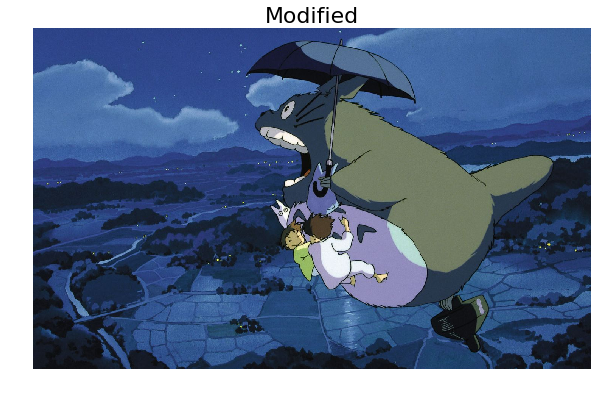

In [69]:
# Load img:
frame = cv2.imread('totoro.jpg')
frame_res = (600,500)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
OpCV_Utils.show_single_img_plt(frame, 'Modified', fig_size=(10,10))

In [73]:
# Load img:
frame = cv2.imread('totoro.jpg')
frame_res = (600,500)
frame = cv2.resize(frame, frame_res)
frameToShow = frame.copy()

# Set window and mouse callback:
cv2.namedWindow('Video Stream')
cv2.setMouseCallback('Video Stream', pointMouseCallback)

# Starting Conditions:
clicked = False
start = False
p1 = (0, 0)
radius = 10
mouse= (0, 0)

while True:
    
    # Get Frame:
   
    frame = cv2.resize(frame, frame_res)
    
    ###############################################################################################################
    ############################################# Processing ######################################################
    
    if clicked:
        # Split channels:
        B = frame[:,:,0]
        G = frame[:,:,1]
        R = frame[:,:,2]
        channels = [B, G, R]

        for chanel in channels:

            limitA, limitB, limitC, limitD = calcLimits(p1, chanel, radius)
            frag = chanel[limitA:limitB, limitC:limitD]

            blurred = cv2.GaussianBlur(frag, (3, 3), 1)
            chanel[limitA:limitB, limitC:limitD] = blurred

        # Restore frame:
        frame[:,:,0] = B
        frame[:,:,1] = G
        frame[:,:,2] = R
        
    frameToShow = frame.copy()
    
    cv2.circle(frameToShow, mouse, radius, (0,0,0))
    
    ###############################################################################################################
    ###############################################################################################################
    # Keyboard Controls:
    key = cv2.waitKey(1) or 0xff   
    if key == ord('k'):
        break
        
    if key == ord('1'):
        radius += 5
        
    if key == ord('2'):
        radius  -= 5
        
    if radius <=0:
        radius = 1
        
    ###############################################################################################################
    # Show Frame:
    cv2.imshow("Video Stream", frameToShow)
    ###############################################################################################################
    
cv2.destroyAllWindows()

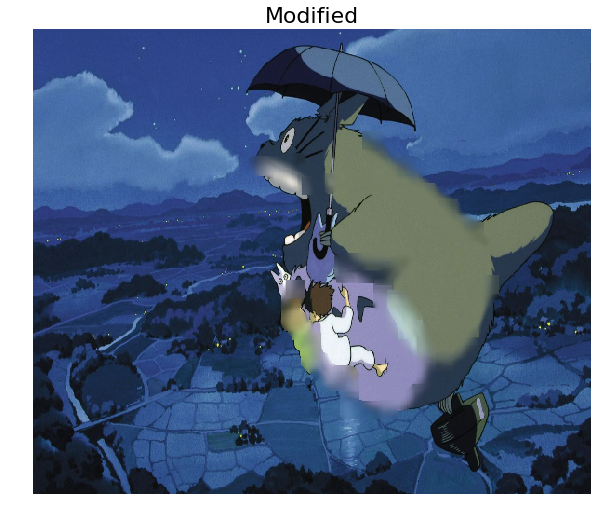

In [66]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
OpCV_Utils.show_single_img_plt(frame, 'Modified', fig_size=(10,10))